#  Building Model for Predicting Loan status 

## Introduction

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people.
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. (source: https://www.prosper.com/about)

We have taken loan data from 2005 to 2014.Dataset contains loan information from prosper, having 113937 rows of loan listings with 81 columns. It has features columns like 'LoanStatus',ClosedDate','BorrowerAPR',
'BorrowerRate','Occupation', 'CreditScoreRangeLower',EmploymentStatus','DebtToIncomeRatio',IncomeRange',
'TotalProsperLoans','MonthlyLoanPayment'.

Prosper had problem with increased default rate till 2009, then it came up with prosper rating score(SEC guidelines)to decide on eligibility and interest rate. Since then default rate reduced much. Now we have data available from 2009 -14 with prosper rating to train our machine learning models to make predictions.

This project aims to build model to predict loan status with given features as input. Since our target data is qualitative and has multiple categories, We can use multi class classification models like Decision tree, SVM and KNN classifiers.



#### Data Dictionary:

https://docs.google.com/spreadsheets/d/1k60B40cr0YAR51X8dmqLGyYBqKzN80Vm2Pnxx3GtHcw/edit?usp=sharing




### Importing Modules

In [114]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Models from Sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

# Model evaluation 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_log_error
from mlxtend.plotting import plot_confusion_matrix


### Loading Data

In [65]:
# Setting row & column display limits
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',50)

In [66]:
# Loading dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [67]:
# Checking null values
df.isnull().sum().to_frame()

,0
ListingKey,0
ListingNumber,0
ListingCreationDate,0
CreditGrade,84984
Term,0
...,...
PercentFunded,0
Recommendations,0
InvestmentFromFriendsCount,0
InvestmentFromFriendsAmount,0


In [68]:
df.shape

(113937, 81)

In [69]:
# Checking for last date in dataset
df.ListingCreationDate.max()

'2014-03-10 12:20:53.760000000'

In [70]:
# Getting data after SEC guidelines implementation
df_latest = df[df['ListingCreationDate']> '2010-01-01']

### Data Cleaning

In [71]:
# Checking for duplicates
df_latest.duplicated().sum()

0

In [72]:
# Removing duplicates
df_latest = df_latest.drop_duplicates()

In [73]:
# Getting columns with null values
null_val = df_latest.isnull().sum()
null_val[null_val>0]

CreditGrade                            82675
ClosedDate                             58848
Occupation                              1333
EmploymentStatusDuration                  19
GroupKey                               80881
DebtToIncomeRatio                       7084
TotalProsperLoans                      63809
TotalProsperPaymentsBilled             63809
OnTimeProsperPayments                  63809
ProsperPaymentsLessThanOneMonthLate    63809
ProsperPaymentsOneMonthPlusLate        63809
ProsperPrincipalBorrowed               63809
ProsperPrincipalOutstanding            63809
ScorexChangeAtTimeOfListing            66959
LoanFirstDefaultedCycleNumber          76760
dtype: int64

In [74]:
df_latest.shape

(82675, 81)

In [75]:
# Removing columns not required for model building
cols  = ['CreditGrade','GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled',
         'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ListingCreationDate',
         'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding', 
         'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']
df_latest.drop(columns=cols,axis=1,inplace=True)

In [76]:
# Treating Null values
df_latest['Occupation'].fillna('Other',inplace=True)
df_latest['EmploymentStatusDuration'].fillna(0,inplace=True)
df_latest['DebtToIncomeRatio'].fillna(0,inplace=True)

In [77]:
# Checking null values
null_val = df_latest.isnull().sum()
null_val[null_val>0]

ClosedDate    58848
dtype: int64

In [78]:
# Changing datatype
df_latest['LoanOriginationDate'] = pd.to_datetime(df_latest['LoanOriginationDate'])
df_latest['ClosedDate'] = pd.to_datetime(df_latest['ClosedDate'])

In [79]:
df_latest[df_latest['ClosedDate']<df_latest['LoanOriginationDate']]
# There is a listing with closed date before loan origination date, we can remove these row

,ListingKey,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
108297,DEAA359893047281162F432,1099553,36,Defaulted,2010-03-16,0.14206,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,A,11.0,1,CO,Professional,Self-employed,7.0,False,False,2013-12-27 12:02:52,660.0,679.0,1983-01-01 00:00:00,6.0,5.0,33.0,4,96.0,0.0,3.0,1.0,330.0,36.0,1.0,0.0,491.0,0.0,3700.0,30.0,0.5,2.0,0.0,"$75,000-99,999",False,6250.0,5BA53702830459166F4AD14,123,3,124070,2500,2013-12-31,Q4 2013,050B3418715458847641BA4,82.31,163.8399,119.1,44.7399,-3.99,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [80]:
# Deleting rows with wrong values
discard = df_latest[df_latest['ClosedDate']<df_latest['LoanOriginationDate']].index
df_latest.drop(discard,axis=0,inplace=True)

In [81]:
features = [ 'ListingNumber', 'Term','LoanStatus', 'ClosedDate',
 'BorrowerRate','ProsperRating (numeric)', 'ListingCategory (numeric)',
 'BorrowerState','Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled','CreditScoreRangeLower',
 'CreditScoreRangeUpper','FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
 'TotalCreditLinespast7years', 'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment', 
 'InquiriesLast6Months', 'TotalInquiries','CurrentDelinquencies', 'AmountDelinquent',
 'DelinquenciesLast7Years','PublicRecordsLast10Years', 'PublicRecordsLast12Months','RevolvingCreditBalance', 
 'BankcardUtilization','AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable','StatedMonthlyIncome',
 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']

In [82]:
# Getting subset
df_new = df_latest[features]
df_new.shape

(82674, 43)

In [83]:
na_val = df_new.isnull().sum()
na_val[na_val>0]

ClosedDate    58848
dtype: int64

In [84]:
# Adding new column Year, Month
df_new['Year'] = df_new['LoanOriginationDate'].apply(lambda x: x.year)
df_new['Month'] = df_new['LoanOriginationDate'].apply(lambda x: x.month)
# Checking values
df_new['Month'].value_counts()

/tmp/ipykernel_96949/570900292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Year'] = df_new['LoanOriginationDate'].apply(lambda x: x.year)
/tmp/ipykernel_96949/570900292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month'] = df_new['LoanOriginationDate'].apply(lambda x: x.month)


1     9199
12    8388
10    8368
2     7835
11    7588
9     6486
8     6390
7     6274
3     6021
6     5931
5     5348
4     4846
Name: Month, dtype: int64

In [85]:
# Checking target values
df_new['LoanStatus'].value_counts()

Current                   56576
Completed                 17819
Chargedoff                 5083
Defaulted                   924
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [86]:
# Treating target values

ind = df_new[df_new['LoanStatus'].isin(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)',
                                  'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'])].index
ind1 = df_new[df_new['LoanStatus'] == 'FinalPaymentInProgress'].index

df_new.loc[ind,'LoanStatus']='Delayed'
df_new.loc[ind1,'LoanStatus']='Completed'

In [87]:
df_new['LoanStatus'].value_counts()

Current       56576
Completed     18024
Chargedoff     5083
Delayed        2067
Defaulted       924
Name: LoanStatus, dtype: int64

### Data Preparation

In [88]:
# Identifying Categorical and Numerical features
category = []
integer = []
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        category.append(label)
    else:
        integer.append(label)
        
category

['LoanStatus',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanOriginationQuarter']

In [89]:
# Making copy to prepare for modeling
data = df_new.copy()
data.reset_index()
data.sample(1)

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,Month
93209,531819,36,Completed,2012-09-13,0.2574,3.0,7,WA,Accountant/CPA,Self-employed,149.0,False,False,2011-10-10 13:58:54,640.0,659.0,1995-06-01 00:00:00,6.0,6.0,9.0,6,385.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,9776.0,0.87,967.0,0.0,"$25,000-49,999",False,2500.0,0,29,54446,10000,2011-10-13,Q4 2011,401.52,2011,10


In [93]:
# Converting features to categorical
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [94]:
# Categorical features to codes
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes+1

In [97]:
data.sample(1)

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,Month
72331,977573,36,3,0,0.2045,4.0,1,11,51,1,32.0,False,False,64412,740.0,759.0,10183,9.0,9.0,28.0,5,523.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,2200.0,0.2,8159.0,0.55,4,True,4000.0,0,4,112120,15000,973,17,560.9,2013,11


### Building Model

In [98]:
# Dividing Features and Target as Train and Test set
X_train,X_test,y_train,y_test = train_test_split(data.drop('LoanStatus',axis=1),data['LoanStatus'],
                                                 test_size=0.1,random_state=42)

#### Support vector machine classifier

In [34]:
# Training SVC
#clf = SVC()
#clf.fit(X_train, y_train)

In [35]:
# Model Accuracy for X_test
#clf.score(X_test,y_test)

In [36]:
#y_pred = clf.predict(X_test)
#print(classification_report(y_test,y_pred))

In [37]:
#np.sqrt(mean_squared_log_error(y_test,y_pred))

In [38]:
# Creating confusion matrix
#plot_confusion_matrix(confusion_matrix(y_test,y_pred),figsize=(5,3))

#### Decision tree classifier

In [99]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
dtc.score(X_test,y_test)

0.9874213836477987

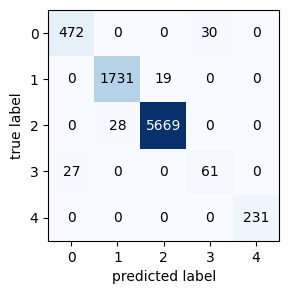

In [107]:
dty_pred = dtc.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,dty_pred),figsize=(5,3));                      

In [42]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.07697

In [43]:
print(classification_report(y_test,dty_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       502
           2       0.99      0.99      0.99      1750
           3       1.00      1.00      1.00      5697
           4       0.69      0.69      0.69        88
           5       1.00      1.00      1.00       231

    accuracy                           0.99      8268
   macro avg       0.92      0.92      0.92      8268
weighted avg       0.99      0.99      0.99      8268



#### KNN Classifier

In [44]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
knc.score(X_test,y_test)

0.7547169811320755

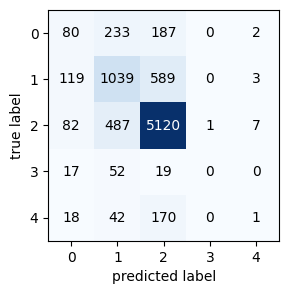

In [109]:
kny_pred = knc.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,kny_pred),figsize=(5,3));

In [47]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.07697

In [48]:
print(classification_report(y_test,dty_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       502
           2       0.99      0.99      0.99      1750
           3       1.00      1.00      1.00      5697
           4       0.69      0.69      0.69        88
           5       1.00      1.00      1.00       231

    accuracy                           0.99      8268
   macro avg       0.92      0.92      0.92      8268
weighted avg       0.99      0.99      0.99      8268



#### Naive Bayes Classifier

In [49]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [50]:
gnb.score(X_test,y_test)

0.9039671020803096

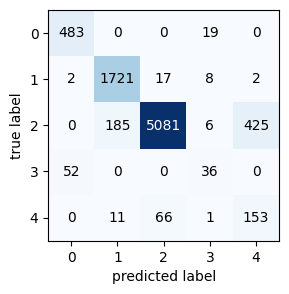

In [110]:
gny_pred = gnb.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,gny_pred),figsize=(5,3));

In [52]:
np.sqrt(mean_squared_log_error(y_test,dty_pred))

0.07697

In [53]:
print(classification_report(y_test,gny_pred))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       502
           2       0.90      0.98      0.94      1750
           3       0.98      0.89      0.94      5697
           4       0.51      0.41      0.46        88
           5       0.26      0.66      0.38       231

    accuracy                           0.90      8268
   macro avg       0.71      0.78      0.73      8268
weighted avg       0.94      0.90      0.92      8268



### Decision Tree classifier produces much desired result. We can fine tune the parameters for the decision tree model

## Building Ideal model with Decision Tree

In [119]:
# Defining parameter for tuning model
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)}

# Using random search to identify best parameters
dtcl = DecisionTreeClassifier(random_state=42)
rscv = RandomizedSearchCV(dtcl, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42)

rscv.fit(X_train, y_train)

bestparams = rscv.best_params_
bestscore = rscv.best_score_

print(f"Best Parameters (Random Search): {bestparams}")
print(f"Best Score (Random Search): {bestscore}")

Best Parameters (Random Search): {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 6, 'criterion': 'entropy'}
Best Score (Random Search): 0.9920570974022367


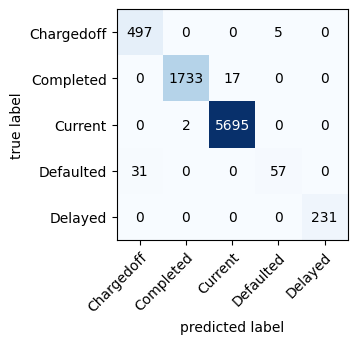

In [128]:
dtcm = DecisionTreeClassifier(min_samples_split= 2, min_samples_leaf= 2, max_depth= 6, 
                              criterion= 'entropy',random_state=42)
dtcm.fit(X_train, y_train)
dtcy_pred = dtcm.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test,dtcy_pred),figsize=(5,3),
                      class_names=['Chargedoff','Completed','Current','Defaulted','Delayed']);

In [125]:
print(classification_report(y_test,dtcy_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       502
           2       1.00      0.99      0.99      1750
           3       1.00      1.00      1.00      5697
           4       0.92      0.65      0.76        88
           5       1.00      1.00      1.00       231

    accuracy                           0.99      8268
   macro avg       0.97      0.93      0.94      8268
weighted avg       0.99      0.99      0.99      8268



### Decision tree model after fine tuning shows improved prediction in Current and Completed class. In overall it has F1 score of 0.99.